<a href="https://colab.research.google.com/github/Naif-Albader/Regression_Project/blob/main/RealEstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive and pip install

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas==1.3.1
!pip install category_encoders

     |████████████████████████████████| 11.5 MB 5.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


     |████████████████████████████████| 80 kB 4.0 MB/s 


# Imports

In [ ]:
from bs4 import BeautifulSoup
import requests
import time, os
import pandas as pd
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from category_encoders.hashing import HashingEncoder
import numpy as np
from datetime import datetime
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from joblib import dump, load

pd.set_option('display.float_format', '{:.2f}'.format)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

------

# Web scrapping

In [ ]:
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
x =['ديسمبر','نوفمبر','اكتوبر','سبتمبر','اوغسطس','يوليو','يونيو','مايو','ابريل','مارس','فبراير','يناير']
dfs = []

In [ ]:
x.reverse()

months = x

x[0]

months[0]

In [ ]:
driver = webdriver.Chrome(chromedriver)
driver.get('https://www.moj.gov.sa/ar/opendata/bi/birealestate/Dashboards/100_kpiDistrict/101_Monthly/kpi101_04_G.aspx')
driver.maximize_window()
driver.find_element_by_xpath(
"//select[@name='pps_9cff892d90c34d10b920290a355684fcSelect']/option[text()='منطقة الرياض']").click()
time.sleep(2)
#select الاحياء
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//div[@id='pps_bc4df99f7ddf4407b566bcb3f37376f4tree-view-control']"))).click()

# تحديد الكل
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//input[@id='pps-tree-selector-pps_bc4df99f7ddf4407b566bcb3f37376f4tree-view-control']"))).click()

# موافق
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="pps-tree-apply-pps_bc4df99f7ddf4407b566bcb3f37376f4tree-view-control"]'))).click()

for year in years:
            print(year)

            # select year
            element = driver.find_element_by_id("pps_e01a528e84b545e4b09e8bc38502e64eSelect")
            drp = Select(element)
            drp.select_by_visible_text(year)
            time.sleep(4)
            for month in months:
                print(month)            

                # select month
                WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//td[@id="pps_f5fec0bcae774576863e91c571a948e3Selection"]'))).click()

                WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, f'//a[@title="{month}/ {year}"]'))).click()


                #الكل
                # driver.find_element_by_xpath('//a[@id="olap_toolbar_ti_appi"]').click()
                WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, '//*[@id="olap_toolbar_ti_appi"]'))).click()
                WebDriverWait(driver, 30).until(EC.invisibility_of_element((By.XPATH, '//*[@id="olap_toolbar_ti_appi"]')))




                #scrap
                soup = BeautifulSoup(driver.page_source)
                table = dict()
                counter = 1
                newrow = 1
                table[str(counter)] = []
                find_td = soup.find('table', class_='ms-bigrid-table').find_all('td', class_ = ['ms-bigrid-rowheaders','ms-bigrid-oncolumns'])

                for link in find_td:
                    if ( (newrow % 9 == 0 and int(len(find_td)/8) != counter) ):
                        newrow = 1
                        counter = counter + 1
                        table[str(counter)] = []
                        #table[str(counter)].append(str(link.text).strip())

                        pass
                    table[str(counter)].append(str(link.text).strip())
                    newrow = newrow+1

                df = pd.DataFrame(table).T
                df.columns = ['Neighborhood', 'Scheme',
                   'Land', 'Date',
                   'Id', 'Price (SAR)',
                   'Area (m2)', 'Price (m2)']
                dfs.append(df)

-----

In [ ]:
df = pd.concat(dfs)

In [ ]:
df.to_pickle("df.pkl")

# EDA

## 1. Importing the dataset from pikkle

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/out.pkl")

In [ ]:
df.head()

,Neighborhood,Scheme,Land,Date,Id,Price (SAR),Area (m2),Price (m2)
1,3020/ و,مخطط/أخرى,قطعة 6341,2010-01-06,553734,"ر.س.‏ 135,000",911.50,148
2,3020/ و,مخطط/أخرى,قطعة 6341,2010-01-12,558395,"ر.س.‏ 149,000",911.50,163
3,أحد,مخطط/2022,قطعة 194/1,2010-01-09,555761,"ر.س.‏ 150,000",500.00,300
4,أحد,مخطط/2485,قطعة 122,2010-01-02,550067,"ر.س.‏ 662,860","1,441.00",460
5,أحد,مخطط/2485,قطعة 153,2010-01-09,555309,"ر.س.‏ 130,000",625.00,208


In [ ]:
#Drop the unnessery columns, price for multi-collinearity
df.drop(columns=['Id','Price (m2)'], inplace=True)

## 1. Basic information about dataset and clean the data

Here we  look at basic information about the dataset

In [ ]:
# Dataframe dimensions
df.shape

(599630, 6)

In [ ]:
# Display first 10 rows
df.head(10)

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)
1,3020/ و,مخطط/أخرى,قطعة 6341,2010-01-06,"ر.س.‏ 135,000",911.50
2,3020/ و,مخطط/أخرى,قطعة 6341,2010-01-12,"ر.س.‏ 149,000",911.50
3,أحد,مخطط/2022,قطعة 194/1,2010-01-09,"ر.س.‏ 150,000",500.00
4,أحد,مخطط/2485,قطعة 122,2010-01-02,"ر.س.‏ 662,860","1,441.00"
5,أحد,مخطط/2485,قطعة 153,2010-01-09,"ر.س.‏ 130,000",625.00
6,أحد,مخطط/2485,قطعة 187,2010-01-26,"ر.س.‏ 170,000",750.00
7,أحد,مخطط/2485,قطعة 203,2010-01-24,"ر.س.‏ 140,000",625.00
8,أحد,مخطط/2485,قطعة 203,2010-01-30,"ر.س.‏ 153,000",625.00
9,أحد,مخطط/2485,قطعة 206,2010-01-17,"ر.س.‏ 145,000",625.00
10,أحد,مخطط/2485,قطعة 223,2010-01-17,"ر.س.‏ 185,000",865.00


In [ ]:
# Column datatypes
df.dtypes

Neighborhood    object
Scheme          object
Land            object
Date            object
Price (SAR)     object
Area (m2)       object
dtype: object

Now lets try to clean the data and convert the object to numircal

In [ ]:
#Function to clean the data
def clean(string):
    string = string.str.replace(",","").str.replace("ر.س.","").str.replace('\u200f', '').str.strip().astype(float)
    return string

In [ ]:
#We clean both columns
df['Price (SAR)'] = clean(df['Price (SAR)'])
df['Area (m2)'] = clean(df['Area (m2)'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#data after cleaning
df.head()

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)
1,3020/ و,مخطط/أخرى,قطعة 6341,2010-01-06,135000.00,911.50
2,3020/ و,مخطط/أخرى,قطعة 6341,2010-01-12,149000.00,911.50
3,أحد,مخطط/2022,قطعة 194/1,2010-01-09,150000.00,500.00
4,أحد,مخطط/2485,قطعة 122,2010-01-02,662860.00,1441.00
5,أحد,مخطط/2485,قطعة 153,2010-01-09,130000.00,625.00


Ref: https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date

In [ ]:
#we define a datetime conversion method 
def  dateconv(obj):
  date = pd.to_datetime(obj)
  if(type(obj) == str):
    date = date.toordinal()
  else:
    date = date.map(datetime.toordinal)
  return date

In [ ]:
#Testing the function
dateconv("2020-1-1")

737425

In [ ]:
##Lets convert the date into numircal
df.Date = dateconv(df.Date)

## Checking and cleaning the data

In [ ]:
#Checking if there is null
df.isnull().sum()

Neighborhood    0
Scheme          0
Land            0
Date            0
Price (SAR)     0
Area (m2)       0
dtype: int64

In [ ]:
#Checking if there is duplicate
print(df.duplicated().sum())

1883


In [ ]:
#Show me the duplicate
df[df.duplicated(keep=False)].head(20)

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)
422,الحائر,مخطط/أخرى,قطعة بدون,733776,100000.00,800.00
423,الحائر,مخطط/أخرى,قطعة بدون,733776,100000.00,800.00
1730,الروضة,مخطط/2042,قطعة 7,733775,300000.00,250.00
1731,الروضة,مخطط/2042,قطعة 7,733775,300000.00,250.00
1732,الروضة,مخطط/2042,قطعة 7,733775,300000.00,250.00
1926,السلى,مخطط/3265,عدد العقارات 2-أول ق…,733790,636000.00,1200.00
1927,السلى,مخطط/3265,عدد العقارات 2-أول ق…,733790,636000.00,1200.00
2004,السويدى,مخطط/2059/ أ,عدد العقارات 2-أول ق…,733775,920000.00,1000.00
2005,السويدى,مخطط/2059/ أ,عدد العقارات 2-أول ق…,733775,920000.00,1000.00
2135,الشفاء,مخطط/3222,عدد العقارات 8-أول ق…,733777,1871100.00,4455.00


In [ ]:
#lets remove the duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [ ]:
# Display unique values of 'Neighborhood'
nh = df['Neighborhood'].unique()

Assumption:
New neighborhood has numbers and not populated, hence removing them will be good choice.

In [ ]:
#Removing new neighborhood
nh = [x for x in nh if not any(c.isdigit() for c in x)]

In [ ]:
df = df[df.Neighborhood.isin(nh)]

In [ ]:
# remove empty spaces
df['Scheme'] = df['Scheme'].replace(" / ", "").replace(" /", "").replace("/ ", "")
df['Land'] = df['Land'].replace(" / ", "").replace(" /", "").replace("/ ", "")

In [ ]:
df.head()

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)
3,أحد,مخطط/2022,قطعة 194/1,733781,150000.00,500.00
4,أحد,مخطط/2485,قطعة 122,733774,662860.00,1441.00
5,أحد,مخطط/2485,قطعة 153,733781,130000.00,625.00
6,أحد,مخطط/2485,قطعة 187,733798,170000.00,750.00
7,أحد,مخطط/2485,قطعة 203,733796,140000.00,625.00


## Distributions of categorical features

In [ ]:
# Summarize categorical features
df.describe(include=['object'])

,Neighborhood,Scheme,Land
count,597740,597740,597740
unique,213,2026,58943
top,الخير,مخطط/أخرى,قطعة بدون
freq,63497,25392,20257


In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
#Disaply unique scheme values
Scheme_fix = df.Scheme.unique()
Scheme_fix

array(['مخطط/2022', 'مخطط/2485', 'مخطط/3152', ..., 'مخطط/818',
       'مخطط/2726/ 2834', 'مخطط/407'], dtype=object)

In [ ]:
#Remove some of schemes (new est.)
new_scheme = []
for line in Scheme_fix:
  if(line.split('/')[1] == 'بدون' or line.split('/')[1] == 'أخرى'):
    continue
  regex = r"[\u0600-\u06FF]+/([0-9]|[\u0600-\u06FF])*((/ ([\u0600-\u06FF]|[0-9])*)|(/([\u0600-\u06FF]|[0-9])*))*(([\u0600-\u06FF]|[0-9])|( [\u0600-\u06FF]|[0-9]))"
  check = re.sub(regex, "", line)
  if( bool(check) == False):
   new_scheme.append(line)

In [ ]:
df = df[df.Scheme.isin(new_scheme)]

In [ ]:
#Disaply unique scheme values
Land_fix = df.Land.unique()
Land_fix

array(['قطعة 194/1', 'قطعة 122', 'قطعة 153', ..., 'قطعة 8676/1',
       'قطعة 8676/2', 'قطعة 2911/2'], dtype=object)

In [ ]:
#Remove some of land (new est.)
new_land = []
for line in Land_fix:
  if(line.split(' ')[0] != 'قطعة'):
    continue
  if(line.split(' ')[1] == 'بدون' or line.split(' ')[1] == 'أخرى'):
    continue
  new_land.append(line)

In [ ]:
df = df[df.Land.isin(new_land)]

In [ ]:
df.describe(include=['object'])

,Neighborhood,Scheme,Land
count,546513,546513,546513
unique,188,1927,58251
top,الخير,مخطط/2351,قطعة 2
freq,63110,15395,551


## Distributions of numeric features

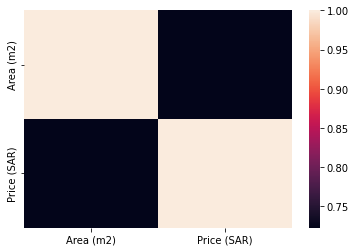

In [ ]:
# Plot heatmap of correlations
sns.heatmap(df[['Area (m2)','Price (SAR)']].corr())

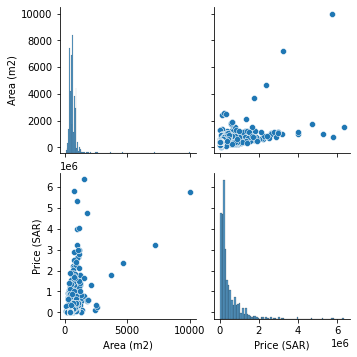

In [ ]:
sns.pairplot(df[['Area (m2)','Price (SAR)']][:1000])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efea375a190>,
      dtype=object)

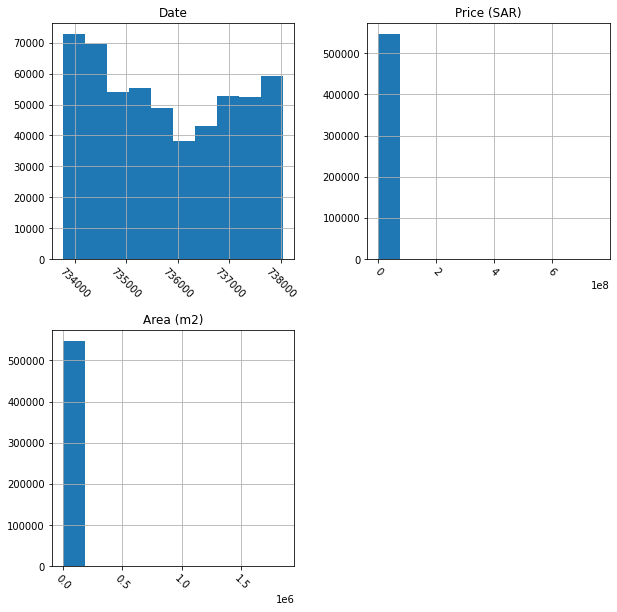

In [ ]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

In [ ]:
# Summarize numerical features
df.describe()

,Date,Price (SAR),Area (m2)
count,546513.00,546513.00,546513.00
mean,735792.80,700669.70,692.29
std,1309.72,3577719.50,7057.34
min,733774.00,10000.00,3.28
25%,734567.00,140000.00,400.00
50%,735675.00,375000.00,500.00
75%,737048.00,870000.00,750.01
max,738049.00,761600456.00,1854224.60


Clearly outliers, lets see them.

In [ ]:
df[df['Area (m2)']==15000000.00]

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)


In [ ]:
df[df['Price (SAR)']==1816001800.00]

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)


In [ ]:
df[df['Area (m2)']==3.28]

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)
1200,الملك عبد الله,مخطط/1924,قطعة 332/2,737615,10000.00,3.28


Lets check boxplots for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


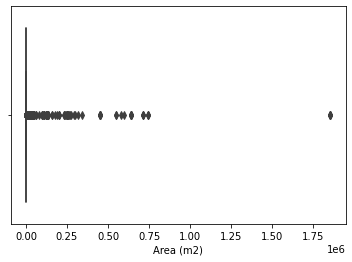

In [ ]:
sns.boxplot(df['Area (m2)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


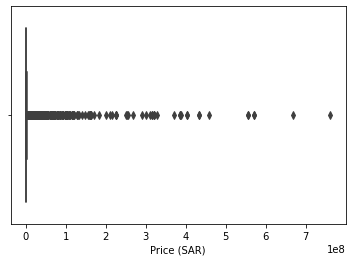

In [ ]:
sns.boxplot(df['Price (SAR)'])

## Dealing with outliers

In [ ]:
df

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)
3,أحد,مخطط/2022,قطعة 194/1,733781,150000.00,500.00
4,أحد,مخطط/2485,قطعة 122,733774,662860.00,1441.00
5,أحد,مخطط/2485,قطعة 153,733781,130000.00,625.00
6,أحد,مخطط/2485,قطعة 187,733798,170000.00,750.00
7,أحد,مخطط/2485,قطعة 203,733796,140000.00,625.00
...,...,...,...,...,...,...
1978,نمار,مخطط/3020/ و,قطعة 7304,738045,630000.00,600.00
1979,نمار,مخطط/3020/ و,قطعة 7698,738035,815000.00,936.00
1980,نمار,مخطط/3020/ و,قطعة 7700,738045,600000.00,936.00
1981,نمار,مخطط/3063,قطعة 2574/2,738040,866513.00,350.00


In [ ]:
min_q, max_q = 0.01, 0.999
def feature_outlier_removal(data, feature, min_q, max_q):
    feature_min_outlier_mask = data[feature] > data[feature].quantile(min_q)
    feature_max_outlier_mask = data[feature] < data[feature].quantile(max_q)
    data = data[(feature_min_outlier_mask) & (feature_max_outlier_mask)]
    print(feature, "min: ", min(data[feature]))
    print(feature, "max: ", max(data[feature]))
    return data
df = feature_outlier_removal(df, "Price (SAR)", 0.01, 0.99)
df = feature_outlier_removal(df, "Area (m2)", 0.03, 0.999)

Price (SAR) min:  26098.0
Price (SAR) max:  4011875.0
Area (m2) min:  240.74
Area (m2) max:  4994.38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518873 entries, 3 to 1982
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Neighborhood  518873 non-null  object 
 1   Scheme        518873 non-null  object 
 2   Land          518873 non-null  object 
 3   Date          518873 non-null  int64  
 4   Price (SAR)   518873 non-null  float64
 5   Area (m2)     518873 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 27.7+ MB


In [ ]:
df.describe()

,Date,Price (SAR),Area (m2)
count,518873.00,518873.00,518873.00
mean,735797.92,589288.16,621.55
std,1308.96,603412.05,341.20
min,733774.00,26220.00,240.74
25%,734579.00,145000.00,400.00
50%,735674.00,370000.00,500.00
75%,737054.00,850000.00,754.00
max,738049.00,4011875.00,4994.38


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


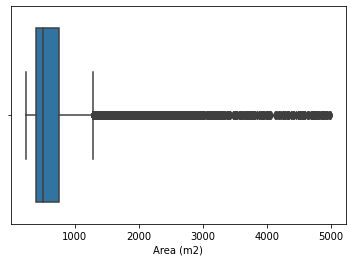

In [ ]:
sns.boxplot(df['Area (m2)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


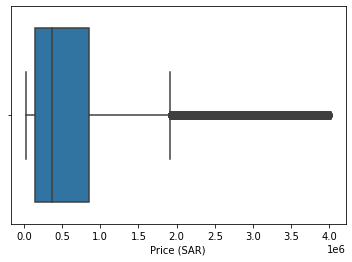

In [ ]:
sns.boxplot(df['Price (SAR)'])

Violin plot (better visual)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


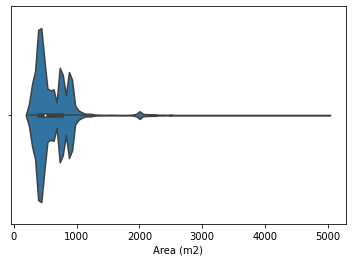

In [ ]:
sns.violinplot(df['Area (m2)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


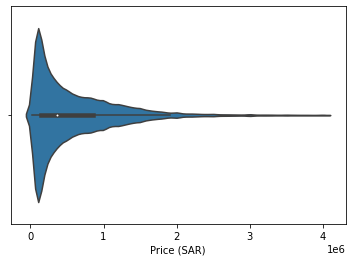

In [ ]:
sns.violinplot(df['Price (SAR)'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efea328ad50>,
      dtype=object)

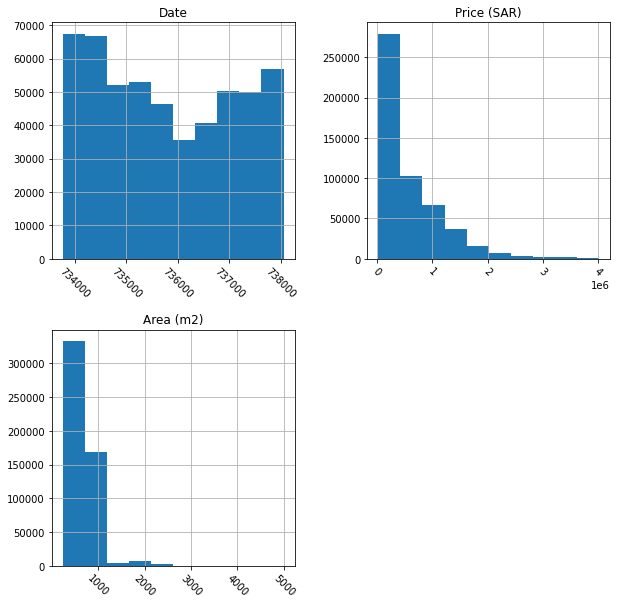

In [ ]:
# Plot histogram grid
df.hist(figsize=(10,10), xrot=-45)

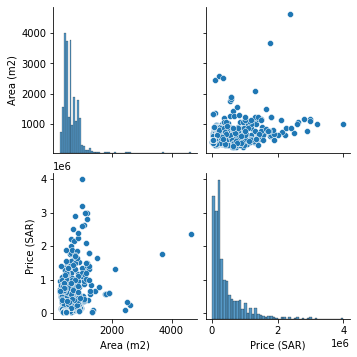

In [ ]:
sns.pairplot(df[['Area (m2)','Price (SAR)']][:1000])

# Feature Engineering

In [ ]:
df.head()

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)
3,أحد,مخطط/2022,قطعة 194/1,733781,150000.00,500.00
4,أحد,مخطط/2485,قطعة 122,733774,662860.00,1441.00
5,أحد,مخطط/2485,قطعة 153,733781,130000.00,625.00
6,أحد,مخطط/2485,قطعة 187,733798,170000.00,750.00
7,أحد,مخطط/2485,قطعة 203,733796,140000.00,625.00


In [ ]:
#Number of sales:
df['Place'] = df.Neighborhood + " " + df.Scheme + " "	+ df.Land
counts = dict(df.Place.value_counts())
# df['Number of sales'] = df.Place.apply(lambda x: counts[x])
df.drop(columns='Place', inplace=True)

In [ ]:
df.head()

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2)
3,أحد,مخطط/2022,قطعة 194/1,733781,150000.00,500.00
4,أحد,مخطط/2485,قطعة 122,733774,662860.00,1441.00
5,أحد,مخطط/2485,قطعة 153,733781,130000.00,625.00
6,أحد,مخطط/2485,قطعة 187,733798,170000.00,750.00
7,أحد,مخطط/2485,قطعة 203,733796,140000.00,625.00


In [ ]:
#Loging the prices
df['Price_log (SAR)'] = df['Price (SAR)'].apply(lambda x: np.log1p(x))

In [ ]:
#lets create new feautre called year
df['year'] = 0
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
for year in years:
  df.year.loc[(df.Date >= dateconv(f"{year}-1-1") ) & (df.Date <= dateconv(f"{year}-12-31") )] = int(year)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#every year the area price increases, hence;
df['Yearly_Area'] = df['year']/df['Area (m2)']

In [ ]:
df['Scheme_unique'] = df['Scheme'] + df['Neighborhood']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 518873 entries, 3 to 1982
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Neighborhood     518873 non-null  object 
 1   Scheme           518873 non-null  object 
 2   Land             518873 non-null  object 
 3   Date             518873 non-null  int64  
 4   Price (SAR)      518873 non-null  float64
 5   Area (m2)        518873 non-null  float64
 6   Price_log (SAR)  518873 non-null  float64
 7   year             518873 non-null  int64  
 8   Yearly_Area      518873 non-null  float64
 9   Scheme_unique    518873 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 43.5+ MB


In [ ]:
df.head()

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2),Price_log (SAR),year,Yearly_Area,Scheme_unique
3,أحد,مخطط/2022,قطعة 194/1,733781,150000.00,500.00,11.92,2010,4.02,مخطط/2022أحد
4,أحد,مخطط/2485,قطعة 122,733774,662860.00,1441.00,13.40,2010,1.39,مخطط/2485أحد
5,أحد,مخطط/2485,قطعة 153,733781,130000.00,625.00,11.78,2010,3.22,مخطط/2485أحد
6,أحد,مخطط/2485,قطعة 187,733798,170000.00,750.00,12.04,2010,2.68,مخطط/2485أحد
7,أحد,مخطط/2485,قطعة 203,733796,140000.00,625.00,11.85,2010,3.22,مخطط/2485أحد


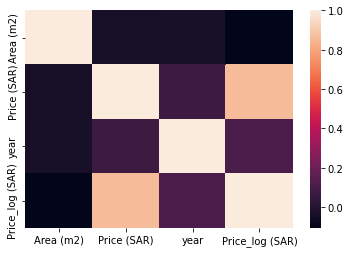

In [ ]:
# Plot heatmap of correlations
sns.heatmap(df[['Area (m2)','Price (SAR)','year','Price_log (SAR)']].corr())

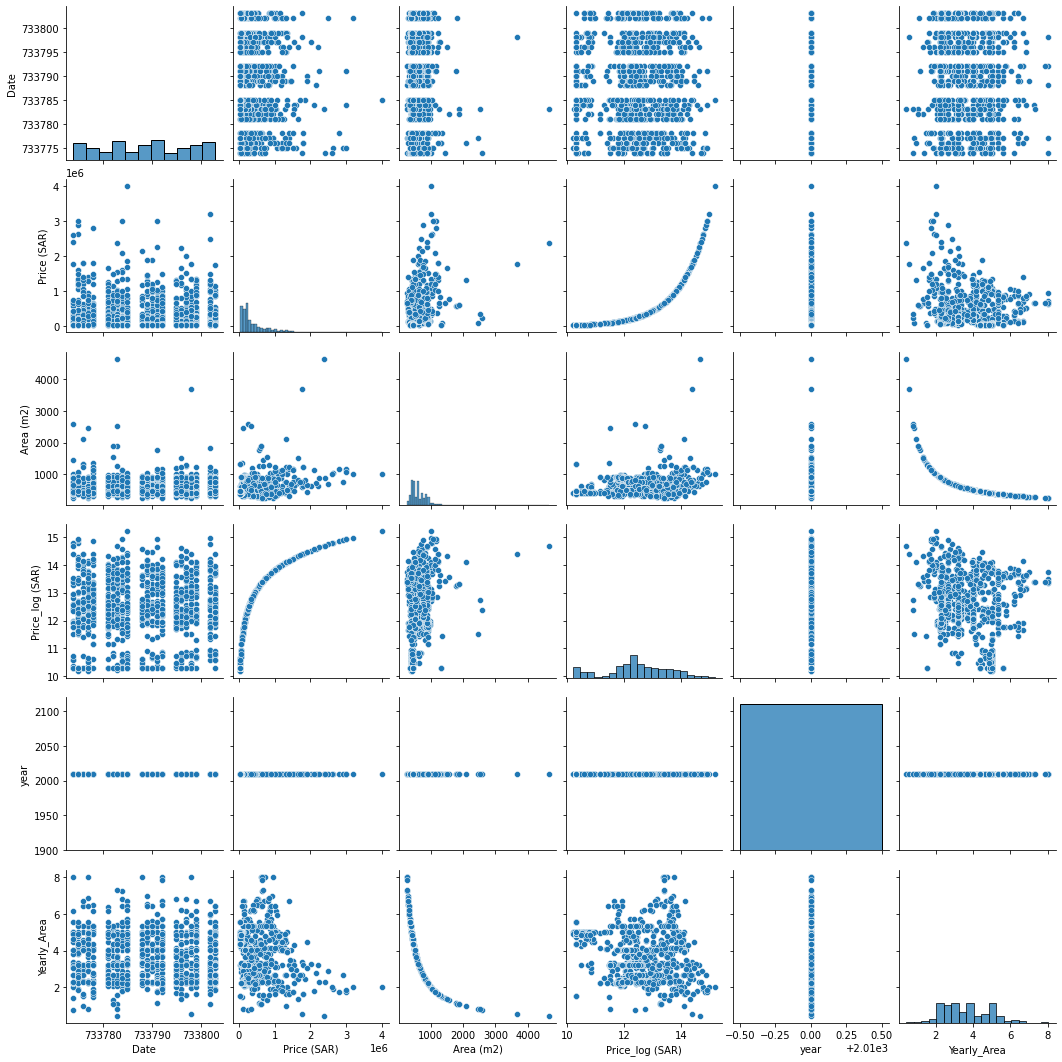

In [ ]:
sns.pairplot(df[:1000])

## Changing catgorical values to hash

In [ ]:
df_new = df.copy()

In [ ]:
he = HashingEncoder(cols=['Neighborhood']).fit(df_new)
data = he.transform(df_new)
# he2 = HashingEncoder(cols=['Scheme_unique']).fit(data)
# data = he2.transform(data)
# he3 = HashingEncoder(cols=['Land']).fit(data)
# data = he3.transform(data)
print(data.info())

In [ ]:
#Removing Land col.
data.drop(columns=['Scheme','Land', 'Scheme_unique'] , inplace=True)
data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Date,Price (SAR),Area (m2),Number of sales,Price_log (SAR),year,Yearly_Area
0,0,0,0,0,1,0,0,0,733781,150000.00,500.00,1,11.92,2010,4.02
1,0,0,0,0,1,0,0,0,733774,662860.00,1441.00,1,13.40,2010,1.39
2,0,0,0,0,1,0,0,0,733781,130000.00,625.00,2,11.78,2010,3.22
3,0,0,0,0,1,0,0,0,733798,170000.00,750.00,2,12.04,2010,2.68
4,0,0,0,0,1,0,0,0,733796,140000.00,625.00,6,11.85,2010,3.22


## Changing catgorical values to onehot

In [ ]:
data = df.copy()

In [ ]:
location = dict()
scheme = dict()
land = dict()

a = pd.get_dummies(data.Neighborhood, drop_first=True)
for i in range(0,len(a.columns)):
  location[str(a.iloc[:,i].name)] = i
  a.rename(columns={a.columns[i]:'N' + str(i) } ,inplace=True )

# b = pd.get_dummies(data.Scheme, drop_first=True)
# for i in range(0,len(b.columns)):
#   scheme[str(b.iloc[:,i].name)] = i
#   b.rename(columns={b.columns[i]:'S' + str(i) } ,inplace=True )

In [ ]:
data[a.columns] = a
# data[b.columns] = b

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3636: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
data.drop(columns=['Neighborhood', 'Scheme', 'Land','Scheme_unique'], inplace=True)

In [ ]:
data.head()

,Date,Price (SAR),Area (m2),Price_log (SAR),year,Yearly_Area,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,...,N143,N144,N145,N146,N147,N148,N149,N150,N151,N152,N153,N154,N155,N156,N157,N158,N159,N160,N161,N162,N163,N164,N165,N166,N167,N168,N169,N170,N171,N172,N173,N174,N175,N176,N177,N178,N179,N180,N181,N182
3,733781,150000.00,500.00,11.92,2010,4.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,733774,662860.00,1441.00,13.40,2010,1.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,733781,130000.00,625.00,11.78,2010,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,733798,170000.00,750.00,12.04,2010,2.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,733796,140000.00,625.00,11.85,2010,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Changing catgorical values to onelabel encoder

In [ ]:
data = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data.Neighborhood = labelencoder.fit_transform(data.Neighborhood).reshape(-1,1)

In [ ]:
data

,Neighborhood,Scheme,Land,Date,Price (SAR),Area (m2),Number of sales,Price_log (SAR),year,Yearly_Area,Scheme_unique
3,0,مخطط/2022,قطعة 194/1,733781,150000.00,500.00,1,11.92,2010,4.02,مخطط/2022أحد
4,0,مخطط/2485,قطعة 122,733774,662860.00,1441.00,1,13.40,2010,1.39,مخطط/2485أحد
5,0,مخطط/2485,قطعة 153,733781,130000.00,625.00,2,11.78,2010,3.22,مخطط/2485أحد
6,0,مخطط/2485,قطعة 187,733798,170000.00,750.00,2,12.04,2010,2.68,مخطط/2485أحد
7,0,مخطط/2485,قطعة 203,733796,140000.00,625.00,6,11.85,2010,3.22,مخطط/2485أحد
...,...,...,...,...,...,...,...,...,...,...,...
1978,182,مخطط/3020/ و,قطعة 7304,738045,630000.00,600.00,1,13.35,2021,3.37,مخطط/3020/ ونمار
1979,182,مخطط/3020/ و,قطعة 7698,738035,815000.00,936.00,2,13.61,2021,2.16,مخطط/3020/ ونمار
1980,182,مخطط/3020/ و,قطعة 7700,738045,600000.00,936.00,1,13.30,2021,2.16,مخطط/3020/ ونمار
1981,182,مخطط/3063,قطعة 2574/2,738040,866513.00,350.00,2,13.67,2021,5.77,مخطط/3063نمار


In [ ]:
data.drop(columns=['Scheme', 'Land','Scheme_unique'], inplace=True)

In [ ]:
data.head()

,Neighborhood,Date,Price (SAR),Area (m2),Number of sales,Price_log (SAR),year,Yearly_Area
3,0,733781,150000.00,500.00,1,11.92,2010,4.02
4,0,733774,662860.00,1441.00,1,13.40,2010,1.39
5,0,733781,130000.00,625.00,2,11.78,2010,3.22
6,0,733798,170000.00,750.00,2,12.04,2010,2.68
7,0,733796,140000.00,625.00,6,11.85,2010,3.22


## Vailidity of previous work

In [ ]:
data.head()

,Date,Price (SAR),Area (m2),Price_log (SAR),year,Yearly_Area,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,...,N143,N144,N145,N146,N147,N148,N149,N150,N151,N152,N153,N154,N155,N156,N157,N158,N159,N160,N161,N162,N163,N164,N165,N166,N167,N168,N169,N170,N171,N172,N173,N174,N175,N176,N177,N178,N179,N180,N181,N182
3,733781,150000.00,500.00,11.92,2010,4.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,733774,662860.00,1441.00,13.40,2010,1.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,733781,130000.00,625.00,11.78,2010,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,733798,170000.00,750.00,12.04,2010,2.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,733796,140000.00,625.00,11.85,2010,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


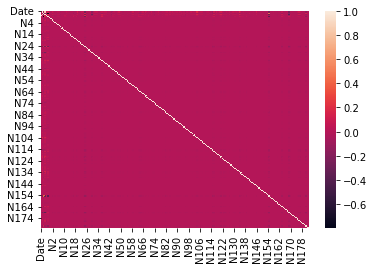

In [ ]:
#Correlation map
sns.heatmap(data.corr())

# Spliting train and test sets

In [ ]:
train = data[(data.Date < dateconv("2021-1-1") )]
val = data[(data.Date >= dateconv("2021-1-1")) & (data.Date < dateconv("2021-5-1") ) ]
test = data[(data.Date >= dateconv("2021-5-1") )]

In [ ]:
train.head()

,Date,Price (SAR),Area (m2),Price_log (SAR),year,Yearly_Area,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,...,N143,N144,N145,N146,N147,N148,N149,N150,N151,N152,N153,N154,N155,N156,N157,N158,N159,N160,N161,N162,N163,N164,N165,N166,N167,N168,N169,N170,N171,N172,N173,N174,N175,N176,N177,N178,N179,N180,N181,N182
3,733781,150000.00,500.00,11.92,2010,4.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,733774,662860.00,1441.00,13.40,2010,1.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,733781,130000.00,625.00,11.78,2010,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,733798,170000.00,750.00,12.04,2010,2.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,733796,140000.00,625.00,11.85,2010,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = list(train.columns)
features.pop(train.columns.get_loc("Price (SAR)"))
features.pop(train.columns.get_loc("Price_log (SAR)")-1)

target = 'Price (SAR)'

In [ ]:
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]
X_val, y_val = val[features], val[target]

In [ ]:
X_train.head()

,Date,Area (m2),year,Yearly_Area,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35,...,N143,N144,N145,N146,N147,N148,N149,N150,N151,N152,N153,N154,N155,N156,N157,N158,N159,N160,N161,N162,N163,N164,N165,N166,N167,N168,N169,N170,N171,N172,N173,N174,N175,N176,N177,N178,N179,N180,N181,N182
3,733781,500.00,2010,4.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,733774,1441.00,2010,1.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,733781,625.00,2010,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,733798,750.00,2010,2.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,733796,625.00,2010,3.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# feature selection

In [ ]:
X_sel = X_train.loc[:,['Date', 'Area (m2)', 'year', 'Yearly_Area']]
X_sel_test = X_test.loc[:,['Date', 'Area (m2)', 'year', 'Yearly_Area']]

In [ ]:
X_sel.columns

Index(['Date', 'Area (m2)', 'year', 'Yearly_Area'], dtype='object')

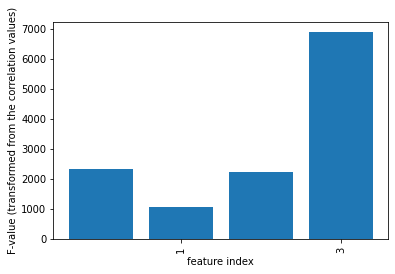

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
f_selector.fit(X_sel, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_sel)
# transform test input data
X_test_fs = f_selector.transform(X_sel_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xticks(np.arange(1, len(X_sel.columns)+1, 2.0), rotation=90)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [ ]:
# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(X_sel, y_train)
# transform train input data
X_train_fs = f_selector.transform(X_sel)
# transform test input data
X_test_fs = f_selector.transform(X_sel_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)

plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

# Model Building

## Baseline model (Linear regression)

In [ ]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X_train, y_train) #fit model to features X, target y

preds = lm.predict(X_test) # generate predictions for X using fit model
# lm.score(Xtest, ytest) # score predictions on X against ground truth target y, using fit model

# score fit model on validation data
train_score = lm.score(X_train, y_train)
val_score = lm.score(X_val, y_val)
test_score = lm.score(X_test, y_test)

# report results
print('\nTraining R^2 score was:', train_score)
print('\Val R^2 score was:', val_score)


Training R^2 score was: 0.5627799513813674
\Val R^2 score was: 0.5578991619323056


In [ ]:
print('\nTesting R^2 score was:', test_score)


Testing R^2 score was: 0.4761793022855575


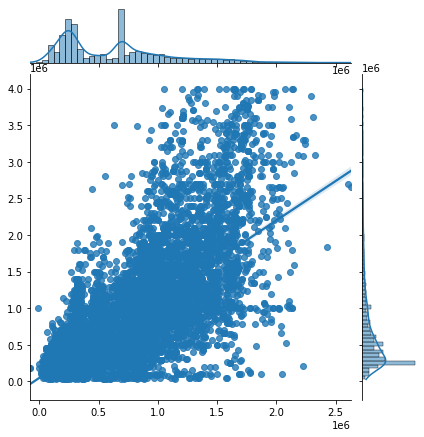

In [ ]:
sns.jointplot(x=preds,y=np.array(y_test), kind='reg')

### Baseline model with scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

In [ ]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(X_train_scaled, y_train) #fit model to features X, target y

preds = lm.predict(X_test_scaled) # generate predictions for X using fit model
# lm.score(Xtest, ytest) # score predictions on X against ground truth target y, using fit model

# score fit model on validation data
train_score = lm.score(X_train_scaled, y_train)
val_score = lm.score(X_val_scaled, y_val)
test_score = lm.score(X_test_scaled, y_test)

# report results
print('\nTraining R^2 score was:', train_score)
print('\Val R^2 score was:', val_score)


Training R^2 score was: 0.5627799510425554
\Val R^2 score was: 0.14311169370835097


In [ ]:
print('\nTesting R^2 score was:', test_score)


Testing R^2 score was: -5.285393999320942e+16


In [ ]:
#evaluate the model (intercept and slope)
print(lm.intercept_)
print(lm.coef_)

583693.3439615316
[ 1.45086877e+05  8.39573784e+04 -7.32327005e+04 -4.47604325e+04
  5.07059969e+03  2.25629170e+03  7.58661291e+04  3.28605483e+04
  1.24565305e+04 -3.81066318e+01  3.25227135e+04  2.90890854e+04
 -9.08556937e+03  6.48412331e+01  2.26199294e+03  2.12003691e+03
  4.35701692e+04  8.30280877e+03 -1.22687645e+03  8.02737991e+03
  1.27211512e+04  2.21127625e+04 -8.67848115e+03  2.54163387e+04
  8.28329850e+04  7.38107519e+02  1.03702018e+04  3.99976014e+04
  4.89513426e+04 -1.24590875e+05  4.12466246e+04  9.29309852e+03
  3.54348294e+03  3.30143454e+04 -5.00267865e+04 -2.69186110e+03
  4.99765501e+04  5.93113993e+04  3.89637869e+04 -2.54842402e+03
  2.98760256e+04  6.53929190e+04  3.88280035e+04  4.41116661e+04
  3.99017929e+04 -5.42105552e+03  1.20393803e+04  1.11843727e+04
 -2.47953819e+04  2.41939727e+04  3.42430637e+04  1.88390689e+16
  3.20742814e+04  6.64081955e+04  3.36897256e+04  6.14441441e+03
 -6.30656600e+03  2.64089369e+03 -2.71132418e+03  1.75426567e+04
 -1.048

C:\Users\yazeed\anaconda3\envs\tf2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price (SAR)', ylabel='Density'>

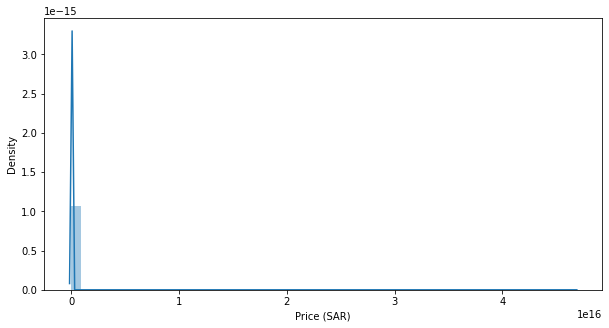

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- preds)
sns.distplot(residuals)

## Polynomial regression

We can't use it due to memoy issue.

In [ ]:
X_train_poly = X_train.copy()
X_test_poly = X_test.copy()
X_val_poly = X_val.copy()

In [ ]:
X_train_poly.drop(columns=X_train.columns[4:],inplace=True)
X_test_poly.drop(columns=X_train.columns[4:],inplace=True)
X_val_poly.drop(columns=X_train.columns[4:],inplace=True)

In [ ]:
X_train_poly.head()

,Date,Area (m2),year,Yearly_Area
3,733781,500.00,2010,4.02
4,733774,1441.00,2010,1.39
5,733781,625.00,2010,3.22
6,733798,750.00,2010,2.68
7,733796,625.00,2010,3.22


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_poly)
X_test_poly = poly.fit_transform(X_test_poly)

clf = linear_model.LinearRegression()
clf.fit(X_train_poly, y_train)
ppp = clf.predict(X_test_poly)
print(r2_score(y_test, ppp))

-0.2248059552454722


## Random forset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# score fit model on validation data
train_score = r2_score(y_train, model.predict(X_train).reshape(-1, 1))
val_score = r2_score(y_val, model.predict(X_val).reshape(-1, 1))
test_score = r2_score(y_test, model.predict(X_test).reshape(-1, 1))

# report results
print('\nTraining R^2 score was:', train_score)
print('\Val R^2 score was:', val_score)


Training R^2 score was: 0.9353503044985882
\Val R^2 score was: 0.5619309446490582


In [ ]:
print('\nTesting R^2 score was:', test_score)


Testing R^2 score was: 0.5834024845077797


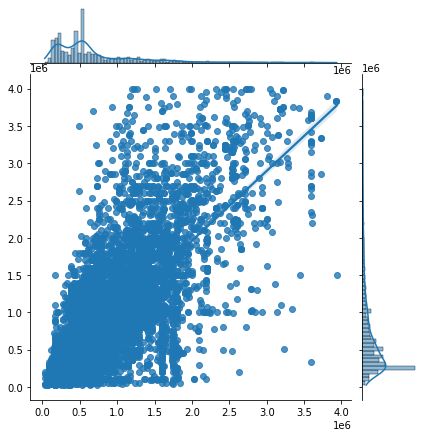

In [ ]:
sns.jointplot(x=model.predict(X_test),y=np.array(y_test), kind='reg')

## XGboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV
regressor = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
regressor.fit(X_train, y_train)
Y_pred_xgb = regressor.predict(X_test)

In [ ]:
# score fit model on validation data
train_score = r2_score(y_train, regressor.predict(X_train))
val_score = r2_score(y_val, regressor.predict(X_val))
test_score = r2_score(y_test, regressor.predict(X_test))

# report results
print('\nTraining R^2 score was:', train_score)
print('\Val R^2 score was:', val_score)


Training R^2 score was: 0.6439669670481682
\Val R^2 score was: 0.6472472553323072


In [ ]:
print('\nTesting R^2 score was:', test_score)


Testing R^2 score was: 0.5498963100108325


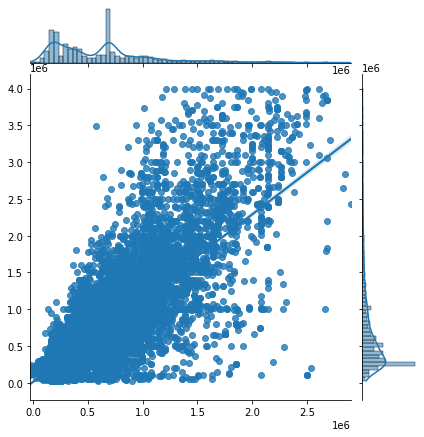

In [ ]:
sns.jointplot(x=Y_pred_xgb,y=np.array(y_test), kind='reg')

----

## Neural network

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [ ]:
from sklearn.externals.joblib import dump, load
dump(scaler, 'scaler.bin', compress=True)

['scaler.bin']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train_scaled,y=y_train.values,
          validation_data=(X_val_scaled,y_val.values),
          batch_size=128,epochs=50, callbacks=[early_stop])

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
# score fit model on validation data
train_score = r2_score(y_train, model.predict(X_train_scaled))
val_score = r2_score(y_val, model.predict(X_val_scaled))
test_score = r2_score(y_test, model.predict(X_test_scaled))

# report results
print('\nTraining R^2 score was:', train_score)
print('\Val R^2 score was:', val_score)


Training R^2 score was: 0.31617513251136753
\Val R^2 score was: 0.2338180547929698


In [ ]:
print('\nTesting R^2 score was:', test_score)


Testing R^2 score was: 0.1481633743166897


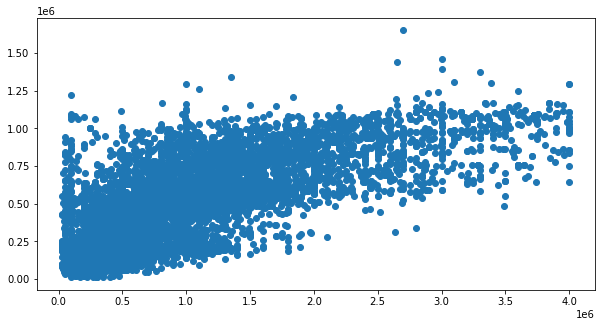

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

## Neural network II

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train_scaled,y=y_train.values,validation_data=(X_val_scaled,y_val_scaled.values),batch_size=128,epochs=100)

Epoch 1/100
3777/3777 [==============================] - 15s 4ms/step - loss: 168051425280.0000 - val_loss: 228969086976.0000
Epoch 2/100
3777/3777 [==============================] - 15s 4ms/step - loss: 142735900672.0000 - val_loss: 215992811520.0000
Epoch 3/100
3777/3777 [==============================] - 15s 4ms/step - loss: 134450601984.0000 - val_loss: 209448402944.0000
Epoch 4/100
3777/3777 [==============================] - 15s 4ms/step - loss: 132935983104.0000 - val_loss: 203934187520.0000
Epoch 5/100
3777/3777 [==============================] - 15s 4ms/step - loss: 132059324416.0000 - val_loss: 200347254784.0000
Epoch 6/100
3777/3777 [==============================] - 15s 4ms/step - loss: 131331932160.0000 - val_loss: 193010614272.0000
Epoch 7/100
3777/3777 [==============================] - 15s 4ms/step - loss: 130871828480.0000 - val_loss: 196346871808.0000
Epoch 8/100
3777/3777 [==============================] - 15s 4ms/step - loss: 130274926592.0000 - val_loss: 2001216634

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
# score fit model on validation data
train_score = r2_score(y_train, model.predict(X_train_scaled))
val_score = r2_score(y_val, model.predict(X_val_scaled))
test_score = r2_score(y_test, model.predict(X_test_scaled))

# report results
print('\nTraining R^2 score was:', train_score)
print('\Val R^2 score was:', val_score)


Training R^2 score was: 0.6573532918267286
\Val R^2 score was: 0.6951644683776002


In [ ]:
print('\nTesting R^2 score was:', test_score)


Testing R^2 score was: 0.575630327638136


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y_test, model.predict(X_test_scaled), squared=False)
mae = mean_absolute_error(y_test, model.predict(X_test_scaled))

In [ ]:
print(rmse)
print(mae)

435613.49870814395
292430.309306744


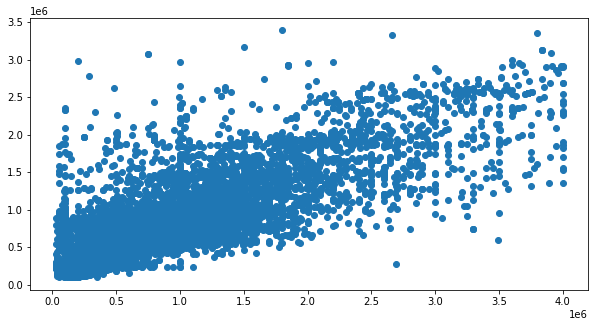

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,model.predict(X_test_scaled))

## Neural network III

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train_scaled,y=y_train.values,validation_data=(X_test_scaled,y_test.values),batch_size=128,epochs=400, callbacks=[early_stop])

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
r2_score(y_test,y_pred)

0.6039384437282036

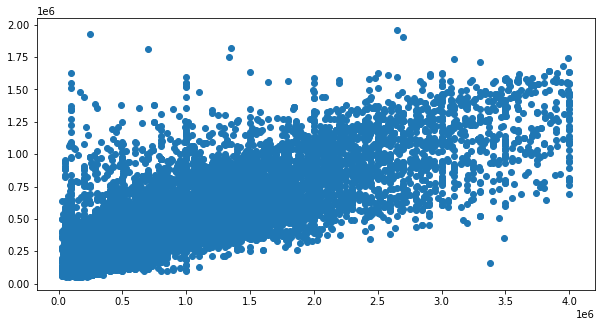

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

# Saving best model for later use

In [ ]:
# Save the weights using the `checkpoint_path` format
model.save_weights("model_best.h5")

In [ ]:
from tensorflow.keras.models import save_model, load_model
save_model(model,'model_best1.model')

INFO:tensorflow:Assets written to: model_best1.model/assets


# Loading best model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

-------

In [ ]:
from keras.models import load_model


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=load('/content/drive/MyDrive/scaler.bin')
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = load_model('/content/drive/MyDrive/model_best1.model', compile=False)
model.compile(optimizer='adam',loss='mse')
model.predict([X_test_scaled])

array([[875009.5 ],
       [943291.75],
       [873551.2 ],
       ...,
       [780534.  ],
       [439737.97],
       [443472.5 ]], dtype=float32)

# Testing sample prediction

----------

In [ ]:
#Lets create data frame for testing
testing = pd.DataFrame()
testing[test.columns] = 0 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



What are avaliable locations?

In [ ]:
location

{'ابو طليحة': 0,
 'ارضة الجو منطقة العز…': 1,
 'اشبيليا': 2,
 'الازدهار': 3,
 'الامانة': 4,
 'الامير مشعل': 5,
 'الاندلس': 6,
 'البديعة': 7,
 'البرية': 8,
 'البساتين': 9,
 'البطحاء': 10,
 'البيان': 11,
 'التعاون': 12,
 'الجامعة': 13,
 'الجبس': 14,
 'الجرادية': 15,
 'الجزيرة': 16,
 'الجنادرية': 17,
 'الحائر': 18,
 'الحزم': 19,
 'الحمراء': 20,
 'الحنو': 21,
 'الخالدية': 22,
 'الخزامى': 23,
 'الخليج': 24,
 'الخير': 25,
 'الدار البيضاء': 26,
 'الدريهمية': 27,
 'الدفاع': 28,
 'الرائد': 29,
 'الرابية': 30,
 'الراية': 31,
 'الربوة': 32,
 'الربيع': 33,
 'الرحمانية': 34,
 'الرسالة': 35,
 'الرفيعة': 36,
 'الرمال': 37,
 'الروابى': 38,
 'الروضة': 39,
 'الريان': 40,
 'الزاهر': 41,
 'الزهراء': 42,
 'الزهرة': 43,
 'الزهور': 44,
 'السعادة': 45,
 'السلام': 46,
 'السلامة': 47,
 'السلى': 48,
 'السليمانية': 49,
 'السويدى': 50,
 'الشرفية': 51,
 'الشرق': 52,
 'الشعاب': 53,
 'الشعلة': 54,
 'الشفاء': 55,
 'الشمال': 56,
 'الشميسى': 57,
 'الشهداء': 58,
 'الصحافة': 59,
 'الصفاء': 60,
 'الصناعية': 61,
 'الضباط': 

In [ ]:
features = list(train.columns)
features.pop(train.columns.get_loc("Price (SAR)"))
features.pop(train.columns.get_loc("Price_log (SAR)")-1)
target = 'Price (SAR)'

In [ ]:
def init(date,area,loc):
  testing = pd.DataFrame()
  testing[test.columns] = 0 
  year = pd.to_datetime(date).year
  date = pd.to_datetime(date).toordinal()
  testing.loc[0,:] = 0
  testing.Date = date
  testing.iloc[0,location[loc]] = 1
  testing['Area (m2)'] = area
  testing['year'] = year
  testing['Yearly_Area'] =testing['year']/testing['Area (m2)']
  return testing

In [ ]:
date = '2021-09-16'
area = 400
loc = 'الملقا'
testing = init(date,area,loc)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [ ]:
testing

,Date,Price (SAR),Area (m2),Price_log (SAR),year,Yearly_Area,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23,N24,N25,N26,N27,N28,N29,N30,N31,N32,N33,...,N143,N144,N145,N146,N147,N148,N149,N150,N151,N152,N153,N154,N155,N156,N157,N158,N159,N160,N161,N162,N163,N164,N165,N166,N167,N168,N169,N170,N171,N172,N173,N174,N175,N176,N177,N178,N179,N180,N181,N182
0,738049,0.00,400,0.00,2021,5.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
xtest, ytest = testing[features], testing[target]
xtest = scaler.transform(xtest)
preds = model.predict(xtest) # generate predictions for X using fit model
preds[0]

array([912687.1], dtype=float32)

In [ ]:
d = {'year': [], 'price': []}
future = pd.DataFrame(data=d)

date = '2021-09-16'
area = 500
loc = 'الياسمين'

counter = 0
predictions = dict()
for k in range(int(date[:4]),int(date[:4])+5):
  testing = init(date,area,loc)
  xtest, ytest = testing[features], testing[target]
  xtest = scaler.transform(xtest)
  preds = model.predict(xtest) # generate predictions for X using fit model
  # predictions[k] = preds[0]
  date = str(k+1) + date[4:]

  future.loc[counter, "year"] = str(k)
  future.loc[counter, "price"] = preds[0]
  counter = counter +1 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: Perf

In [ ]:
future

,year,price
0,2021,2156924.00
1,2022,2428618.75
2,2023,2714075.50
3,2024,3014291.00
4,2025,3323948.00


What my land price will be after 5 years?

In [ ]:
import plotly.express as px

fig = px.line(future, x="year", y="price")
fig.show()


# FLASK

In [ ]:
def init(date,area,loc):
  testing = pd.DataFrame()
  testing[test.columns] = 0 
  year = pd.to_datetime(date).year
  date = pd.to_datetime(date).toordinal()
  testing.loc[0,:] = 0
  testing.Date = date
  testing.iloc[0,location[loc]] = 1
  testing['Area (m2)'] = area
  testing['year'] = year
  testing['Yearly_Area'] =testing['year']/testing['Area (m2)']
  return testing

In [ ]:
!pip install flask-ngrok

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from joblib import dump, load

model = Sequential()
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

from sklearn.preprocessing import MinMaxScaler
scaler=load('/content/drive/MyDrive/scaler.bin')


from keras.models import load_model
model = load_model('/content/drive/MyDrive/model_best1.model', compile=False)
model.compile(optimizer='adam',loss='mse')

import os
template_dir = os.path.abspath('/content/drive/MyDrive/Page//templates')
static_folder = os.path.abspath('/content/drive/MyDrive/Page/static')

from flask import Flask,request,render_template
from flask_ngrok import run_with_ngrok


app = Flask(__name__,template_folder=template_dir,static_folder =static_folder )
run_with_ngrok(app)   
@app.route('/',methods =['GET','POST'])
@app.route("/")
  
def home():
    ne_list = list(location)
    testing = pd.DataFrame()
    testing[test.columns] = 0 
    if request.method == 'POST':
        a = str(request.form.get('day'))
        b = str(request.form.get('month'))
        c = str(request.form.get('year'))

        date = "-".join([a,b,c])

        loc = request.form.get('ne')

        area = float(request.form.get('area'))
        
        features = list(train.columns)
        features.pop(train.columns.get_loc("Price (SAR)"))
        features.pop(train.columns.get_loc("Price_log (SAR)")-1)
        
        testing = init(date,area,str(loc))
        
        xtest = testing[features]
        xtest = scaler.transform(xtest)
      

        prd = round(model.predict(xtest)[0][0],2)
        meter = round(float(prd)/area,2)
        
        ne_list = list(location)
        print(prd)
        return render_template('styled_UI.html',val=prd,colours=ne_list,val2=meter)    
        
    return render_template('styled_UI.html',colours=ne_list)
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://3189-130-211-234-43.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 06:53:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 06:55:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 06:55:30] "GET /static/styles.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 06:55:31] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2021 06:55:31] "GET /static/622055.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 06:55:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 06:55:38] "GET /static/styles.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 06:55:38] "GET /static/622055.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 06:55:39] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2021 06:59:00] "GET / HTTP/1.1" 200 -


973229.75


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:20:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:20:54] "GET /static/styles.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:20:54] "GET /static/622055.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:20:54] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2021 07:20:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:20:58] "GET /static/styles.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:20:58] "GET /static/622055.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:20:58] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2021 07:20:59] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:00] "GET /static/styles.css

561.45


127.0.0.1 - - [22/Sep/2021 07:21:11] "GET /static/622055.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:11] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:11] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:12] "GET /static/styles.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:13] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Sep/2021 07:21:13] "GET /static/622055.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:15] "GET /static/styles.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:15] "GET /static/styles.css

653.36


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:32] "POST / HTTP/1.1" 200 -


1011389.1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:37] "POST / HTTP/1.1" 200 -


2896936.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:38] "POST / HTTP/1.1" 200 -


1233198.6


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:39] "POST / HTTP/1.1" 200 -


2896936.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:42] "POST / HTTP/1.1" 200 -


2006161.5


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:53] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:53] "POST / HTTP/1.1" 200 -


1504635.2
781910.56


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:55] "POST / HTTP/1.1" 200 -


1422857.1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:57] "POST / HTTP/1.1" 200 -


666725.56


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:21:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:57] "GET /static/styles.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:21:58] "GET /static/622055.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/Sep/2021 07:22:02] "POST / HTTP/1.1" 200 -


980642.75


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:22:03] "POST / HTTP/1.1" 200 -


529.77


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:22:29] "POST / HTTP/1.1" 200 -


2744492.2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:22:35] "POST / HTTP/1.1" 200 -


1530931.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:22:36] "POST / HTTP/1.1" 200 -


1530931.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:22:37] "POST / HTTP/1.1" 200 -


1866776.1


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:22:58] "POST / HTTP/1.1" 200 -


1050939.2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:23:04] "POST / HTTP/1.1" 200 -


1893604.8


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:23:09] "POST / HTTP/1.1" 200 -


851827.94


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:23:34] "POST / HTTP/1.1" 200 -


640576.2


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:24:43] "POST / HTTP/1.1" 200 -


760241.4


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3640: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

127.0.0.1 - - [22/Sep/2021 07:30:24] "GET / HTTP/1.1" 200 -
